Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.48      0.55      0.51       146
           1       0.51      0.44      0.47       154

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.50      0.49      0.49       300



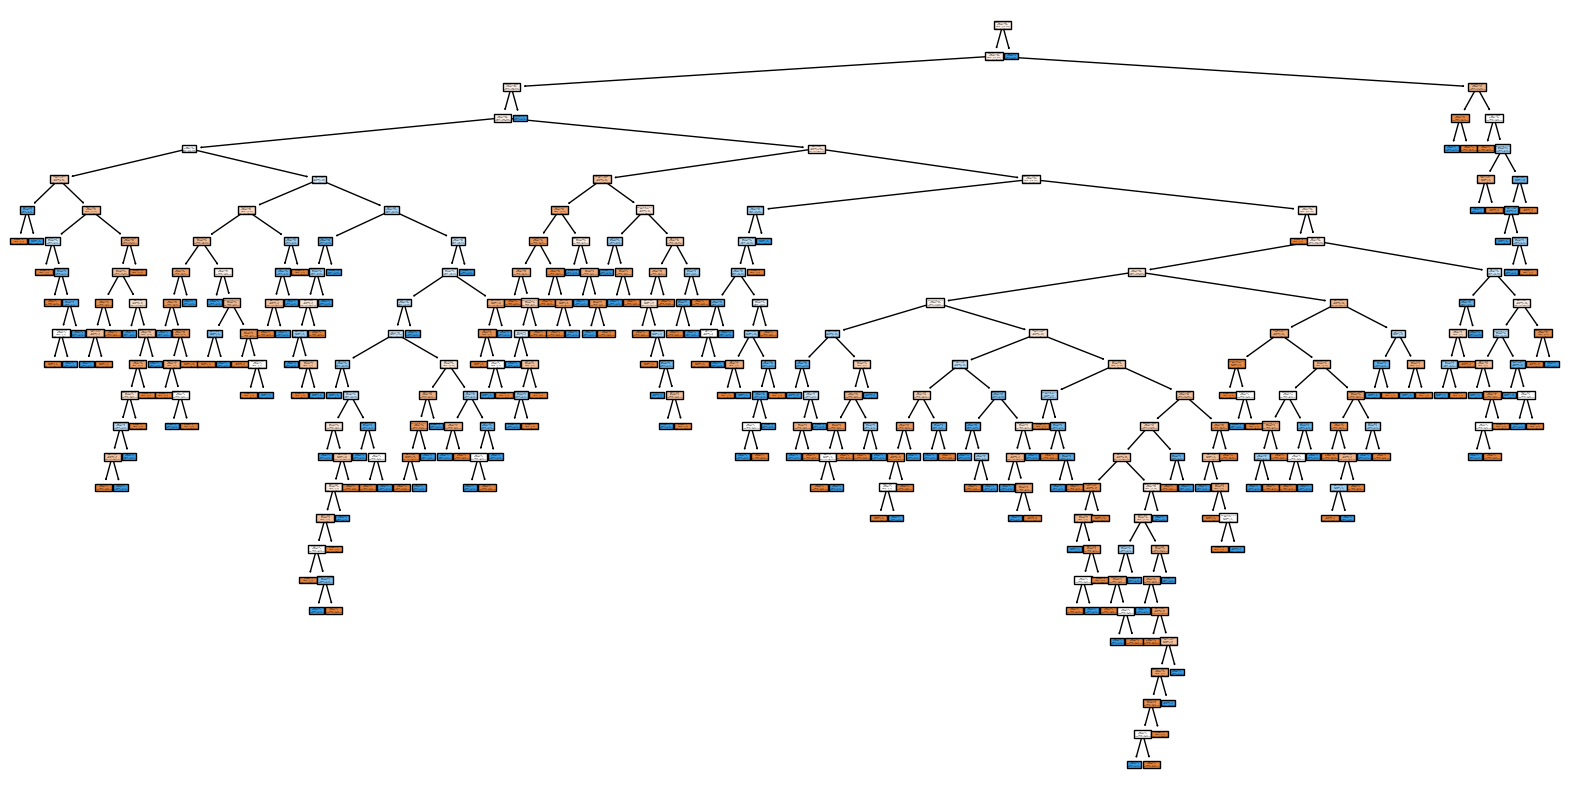

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate a sample dataset
n_samples = 1000

# Create synthetic features
data = {
    'age': np.random.randint(18, 70, size=n_samples),
    'job': np.random.choice(['admin', 'blue-collar', 'student', 'retired'], size=n_samples),
    'marital': np.random.choice(['single', 'married', 'divorced'], size=n_samples),
    'education': np.random.choice(['primary', 'secondary', 'tertiary'], size=n_samples),
    'balance': np.random.uniform(-1000, 3000, size=n_samples),
    'housing': np.random.choice(['yes', 'no'], size=n_samples),
    'loan': np.random.choice(['yes', 'no'], size=n_samples),
    'contact': np.random.choice(['cellular', 'telephone'], size=n_samples),
    'day_of_week': np.random.choice(['mon', 'tue', 'wed', 'thu', 'fri'], size=n_samples),
    'duration': np.random.randint(1, 500, size=n_samples),
    'previous': np.random.randint(0, 10, size=n_samples),
    'poutcome': np.random.choice(['failure', 'nonexistent', 'success'], size=n_samples),
    'subscribed': np.random.choice([0, 1], size=n_samples)  # Target variable
}

df = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target variable
X = df.drop('subscribed', axis=1)
y = df['subscribed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Subscribed', 'Subscribed'])
plt.show()
